In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
FW_team_stats_df = new_players_df[(new_players_df['main_pos'].isin(['FW', 'ST'])) | 
                                            (new_players_df['2nd_pos'].isin(['FW', 'ST']))]

# Display the first few rows of the filtered DataFrame to verify
print(FW_team_stats_df.head(10))


                league  season         team             player nation    pos  \
6   ENG-Premier League    2324      Arsenal      Eddie Nketiah    ENG     FW   
10  ENG-Premier League    2324      Arsenal      Gabriel Jesus    BRA     FW   
24  ENG-Premier League    2324  Aston Villa    Bertrand Traoré    BFA  DF,FW   
35  ENG-Premier League    2324  Aston Villa         Jhon Durán    COL  FW,MF   
42  ENG-Premier League    2324  Aston Villa       Moussa Diaby    FRA  FW,MF   
44  ENG-Premier League    2324  Aston Villa      Ollie Watkins    ENG     FW   
46  ENG-Premier League    2324  Aston Villa  Philippe Coutinho    BRA  MF,FW   
58  ENG-Premier League    2324  Bournemouth    Dominic Solanke    ENG     FW   
59  ENG-Premier League    2324  Bournemouth          Enes Ünal    TUR  MF,FW   
67  ENG-Premier League    2324  Bournemouth      Kieffer Moore    WAL  FW,MF   

       age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
6   24-312  1999.0  12.0             5  

C:\Users\jbuck\AppData\Local\Temp\ipykernel_896\2732264767.py:7: DtypeWarning: Columns (6,31,55,79,103,135,166) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv(file_path)


In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player Metrics\full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        34   
1  ENG-Premier League    2324  Aston Villa                 30        34   
2  ENG-Premier League    2324  Bournemouth                 29        34   
3  ENG-Premier League    2324    Brentford                 28        34   
4  ENG-Premier League    2324     Brighton                 29        32   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     55                      2                       1   
1                     85                      2                       0   
2                     69                      3                       0   
3                     80                      2                       0   
4                     77                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   345                   35

In [3]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
FW_team_stats_df = pd.merge(FW_team_stats_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
FW_team_stats_df = filter_players_by_games_played(FW_team_stats_df, '90s', 5)
print(FW_team_stats_df)


                  league  season             team           player nation  \
0     ENG-Premier League    2324          Arsenal    Eddie Nketiah    ENG   
1     ENG-Premier League    2324          Arsenal    Gabriel Jesus    BRA   
4     ENG-Premier League    2324      Aston Villa     Moussa Diaby    FRA   
5     ENG-Premier League    2324      Aston Villa    Ollie Watkins    ENG   
7     ENG-Premier League    2324      Bournemouth  Dominic Solanke    ENG   
...                  ...     ...              ...              ...    ...   
1072          ARG-League    2324          Tucumán    Mateo Coronel    ARG   
1073          ARG-League    2324          Tucumán      Ramiro Ruiz    ARG   
1074          ARG-League    2324  Vélez Sarsfield     Abiel Osorio    ARG   
1075          ARG-League    2324  Vélez Sarsfield     Lucas Pratto    ARG   
1076          ARG-League    2324  Vélez Sarsfield  Santiago Castro    ARG   

        pos     age    born   90s  Standard_Gls  ...  \
0        FW  24-312

In [4]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(FW_team_stats_df.head())


               league  season         team           player nation    pos  \
0  ENG-Premier League    2324      Arsenal    Eddie Nketiah    ENG     FW   
1  ENG-Premier League    2324      Arsenal    Gabriel Jesus    BRA     FW   
4  ENG-Premier League    2324  Aston Villa     Moussa Diaby    FRA  FW,MF   
5  ENG-Premier League    2324  Aston Villa    Ollie Watkins    ENG     FW   
7  ENG-Premier League    2324  Bournemouth  Dominic Solanke    ENG     FW   

      age    born   90s  Standard_Gls  ...  Per 90 Minutes_G+A_allowed_stand  \
0  24-312  1999.0  12.0             5  ...                              1.48   
1  27-003  1997.0  13.5             4  ...                              1.48   
4  24-274  1999.0  19.1             5  ...                              2.33   
5  28-098  1995.0  29.0            16  ...                              2.33   
7  26-205  1997.0  29.6            16  ...                              2.96   

   Per 90 Minutes_G-PK_allowed_stand  Per 90 Minutes_G+A

In [5]:
for column in FW_team_stats_df.columns:
    print(column)

league
season
team
player
nation
pos
age
born
90s
Standard_Gls
Standard_Sh
Standard_SoT
Standard_SoT%
Standard_Sh/90
Standard_SoT/90
Standard_G/Sh
Standard_G/SoT
Standard_Dist
Standard_FK
Standard_PK
Standard_PKatt
Expected_xG
Expected_npxG
Expected_npxG/Sh
Expected_G-xG
Expected_np:G-xG
League
league.1
season.1
nation.1
pos.1
age.1
born.1
90s.1
SCA_SCA
SCA_SCA90
SCA Types_PassLive
SCA Types_PassDead
SCA Types_TO
SCA Types_Sh
SCA Types_Fld
SCA Types_Def
GCA_GCA
GCA_GCA90
GCA Types_PassLive
GCA Types_PassDead
GCA Types_TO
GCA Types_Sh
GCA Types_Fld
GCA Types_Def
League.1
league.2
season.2
nation.2
pos.2
age.2
born.2
90s.2
Tackles_Tkl
Tackles_TklW
Tackles_Def 3rd
Tackles_Mid 3rd
Tackles_Att 3rd
Challenges_Tkl
Challenges_Att
Challenges_Tkl%
Challenges_Lost
Blocks_Blocks
Blocks_Sh
Blocks_Pass
Int
Tkl+Int
Clr
Err
League.2
league.3
season.3
nation.3
pos.3
age.3
born.3
90s.3
Performance_CrdY
Performance_CrdR
Performance_2CrdY
Performance_Fls
Performance_Fld
Performance_Off
Performance_Crs
Per

In [6]:
import pandas as pd
import numpy as np

def calculate_poacher_stats(df):
    # Calculate the individual stats for the Poacher role
    if 'Standard_Dist' in df.columns and 'Standard_Sh' in df.columns:
        df['distance_per_shot'] = df['Standard_Dist'] / df['Standard_Sh']
        df['inverted_distance_per_shot'] = 1 / df['distance_per_shot']  # Invert since lower is better

    if 'Expected_npxG/Sh' in df.columns:
        df['npxg_per_shot'] = df['Expected_npxG/Sh']
        
    if 'Standard_G/Sh' in df.columns:
        df['goals_per_shot'] = df['Standard_G/Sh']

    if 'Standard_Sh' in df.columns and 'Touches_Touches' in df.columns:
        df['shots_per_touch'] = df['Standard_Sh'] / df['Touches_Touches']

    if 'Touches_Touches' in df.columns and 'Touches_Touches_poss' in df.columns:
        team_total_touches_per_90 = df['Touches_Touches_poss'] / df['90s_poss']
        player_touches_per_90 = df['Touches_Touches'] / df['90s']
        df['player_touches_per_90_percent_team'] = (player_touches_per_90 / team_total_touches_per_90) * 100
        df['inverted_player_touches_percent'] = 1 / df['player_touches_per_90_percent_team']  # Invert since lower is better

    if 'Touches_Touches' in df.columns and 'Touches_Att Pen' in df.columns:
        df['touches_in_att_area_per_total_touches'] = (df['Touches_Att Pen'] / df['Touches_Touches']) * 100

    return df

# Assuming df is your DataFrame with the necessary columns loaded
FW_team_stats_df = calculate_poacher_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df.head())


               league  season         team           player nation    pos  \
0  ENG-Premier League    2324      Arsenal    Eddie Nketiah    ENG     FW   
1  ENG-Premier League    2324      Arsenal    Gabriel Jesus    BRA     FW   
4  ENG-Premier League    2324  Aston Villa     Moussa Diaby    FRA  FW,MF   
5  ENG-Premier League    2324  Aston Villa    Ollie Watkins    ENG     FW   
7  ENG-Premier League    2324  Bournemouth  Dominic Solanke    ENG     FW   

      age    born   90s  Standard_Gls  ...  \
0  24-312  1999.0  12.0             5  ...   
1  27-003  1997.0  13.5             4  ...   
4  24-274  1999.0  19.1             5  ...   
5  28-098  1995.0  29.0            16  ...   
7  26-205  1997.0  29.6            16  ...   

                       url_allowed_stand  League_allowed_stand  \
0      /en/squads/18bb7c10/Arsenal-Stats    ENG-Premier League   
1      /en/squads/18bb7c10/Arsenal-Stats    ENG-Premier League   
4  /en/squads/8602292d/Aston-Villa-Stats    ENG-Premier League

In [7]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_poacher(data, columns):
    """ Calculate Z-scores for the 'Poacher' stats, inverting negative impact stats. """
    z_scores_df = data.copy()
    for col in columns:
        if 'inverted' in col:
            z_scores_df[col + '_z'] = -(z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
        else:
            z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_poacher_score(data, columns, weights):
    """ Compute the weighted 'Poacher' score, scale to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['poacher_score'] = data[z_score_columns].dot(weights)
    min_score = data['poacher_score'].min()
    max_score = data['poacher_score'].max()
    data['poacher_score'] = ((data['poacher_score'] - min_score) / (max_score - min_score)) * 100
    return data

def prepare_final_df(original_df, score_df, score_column):
    """ Merge the calculated scores into the original DataFrame and ensure only relevant columns are included. """
    merged_df = original_df.merge(score_df[['player', 'team', score_column]], on=['player', 'team'], how='left')
    final_df = merged_df[['player', 'team', 'league', score_column]]  # Select only required columns
    return final_df

# Assuming FW_team_stats_df is preloaded with data
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, ['Standard_Dist', 'Standard_G/Sh', 'Expected_npxG/Sh', 'Standard_Sh', 'Touches_Touches', 'Touches_Att Pen', 'Touches_Touches'])
FW_team_stats_df = log_transform(FW_team_stats_df, ['Standard_Dist', 'Standard_G/Sh', 'Expected_npxG/Sh', 'Standard_Sh', 'Touches_Touches', 'Touches_Att Pen', 'Touches_Touches'])

# Generate Z-scores and compute the final score
log_transformed_columns = ['distance_per_shot', 'npxg_per_shot', 'goals_per_shot', 'shots_per_touch', 'inverted_player_touches_percent', 'touches_in_att_area_per_total_touches']
scores_df_poacher = calculate_z_scores_poacher(FW_team_stats_df, log_transformed_columns)
weights_poacher = np.array([0.10, 0.10, 0.15, 0.15, 0.25, .25])  # Adjust the weights as needed
scores_df_poacher = compute_poacher_score(scores_df_poacher, log_transformed_columns, weights_poacher)

# Prepare the final DataFrame for output and merge
FW_scores_df = prepare_final_df(FW_team_stats_df, scores_df_poacher, 'poacher_score')

# Print the updated DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405


In [8]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])


In [9]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'poacher_score')
print(top_poachers)


                      player        team              league  poacher_score
329               Ayase Ueda   Feyenoord      NED-Eredivisie     100.000000
319            Brian Brobbey        Ajax      NED-Eredivisie      99.496899
330         Santiago Giménez   Feyenoord      NED-Eredivisie      96.325476
499              Simon Banza       Braga          POR-League      94.959531
607           Michael Santos    Talleres          ARG-League      94.463635
68          Cristhian Stuani      Girona         ESP-La Liga      93.706393
315             Lebo Mothiba  Strasbourg         FRA-Ligue 1      93.502223
120              Andi Zeqiri        Genk      BEL-Pro League      93.269726
28            Elijah Adebayo  Luton Town  ENG-Premier League      92.831856
147  Mohamed El Amine Amoura    Union SG      BEL-Pro League      91.195848


In [10]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['poacher_score']].describe()
print(descriptive_statistics)


       poacher_score
count     611.000000
mean       61.418862
std        12.657727
min         0.000000
25%        53.285254
50%        60.703909
75%        68.759005
max       100.000000


In [11]:
import pandas as pd
import numpy as np

def calculate_outlet_stats(df):
    # Calculate per 90 stats for player and team
    df['player_touches_per_90'] = df['Touches_Touches'] / df['90s']
    df['team_touches_per_90'] = df['Touches_Touches_poss'] / df['90s_poss']
    df['player_carries_distance_per_90'] = df['Carries_TotDist'] / df['90s']
    df['team_carries_distance_per_90'] = df['Carries_TotDist_poss'] / df['90s_poss']

    # Stat calculations
    df['touches_per_90_ratio'] = df['player_touches_per_90'] / df['team_touches_per_90']
    df['inverted_touches_per_90_ratio'] = 1 / df['touches_per_90_ratio']
    df['progressive_carries_per_touch'] = df['Carries_PrgC'] / df['Touches_Touches']
    df['aerial_duels_won_per_90'] = (df['Aerial Duels_Won'] + df['Aerial Duels_Lost']) / df['90s']
    df['aerial_duels_per_90_ratio'] = df['aerial_duels_won_per_90'] / df['team_touches_per_90']
    df['carry_distance_per_90_ratio'] = df['player_carries_distance_per_90'] / df['team_carries_distance_per_90']

    return df

# Assuming df is your DataFrame with the necessary columns loaded
FW_team_stats_df = calculate_outlet_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df[['inverted_touches_per_90_ratio', 'progressive_carries_per_touch', 'aerial_duels_per_90_ratio', 'carry_distance_per_90_ratio']].head())


   inverted_touches_per_90_ratio  progressive_carries_per_touch  \
0                      24.524345                       0.058989   
1                      16.818493                       0.047945   
4                      20.208232                       0.111298   
5                      25.200575                       0.062327   
7                      21.247764                       0.041060   

   aerial_duels_per_90_ratio  carry_distance_per_90_ratio  
0                   0.005154                     0.041951  
1                   0.004174                     0.068935  
4                   0.001252                     0.063487  
5                   0.005221                     0.033819  
7                   0.009849                     0.054470  


In [12]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_outlet(data, columns):
    """ Calculate Z-scores for log-transformed outlet columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_outlet_score(data, columns, weights):
    """ Compute the weighted 'Outlet' score, scale to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['outlet_score'] = data[z_score_columns].dot(weights)
    min_score = data['outlet_score'].min()
    max_score = data['outlet_score'].max()
    data['outlet_score'] = ((data['outlet_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and their weights
outlet_columns = [
    'inverted_touches_per_90_ratio', 'progressive_carries_per_touch',
    'aerial_duels_per_90_ratio', 'carry_distance_per_90_ratio'
]
weights_outlet = np.array([0.20, 0.25, 0.25, 0.30])  # Adjusted weights

# Assuming FW_team_stats_df is preloaded with your data
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, outlet_columns)
FW_team_stats_df = log_transform(FW_team_stats_df, outlet_columns)
log_transformed_columns = [col + '_log' for col in outlet_columns]
scores_df_outlet = calculate_z_scores_outlet(FW_team_stats_df, log_transformed_columns)
scores_df_outlet = compute_outlet_score(scores_df_outlet, log_transformed_columns, weights_outlet)

# Merge the 'outlet_score' into FW_scores_df
if 'player' not in FW_scores_df.columns or 'team' not in FW_scores_df.columns or 'league' not in FW_scores_df.columns:
    FW_scores_df.reset_index(inplace=True)

FW_scores_df = FW_scores_df.merge(scores_df_outlet[['player', 'team', 'league', 'outlet_score']],
                                  on=['player', 'team', 'league'], how='left')

# Print the updated DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score  \
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789   
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726   
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051   
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000   
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405   

   outlet_score  
0     64.415332  
1     59.462533  
2     59.497231  
3     60.370277  
4     70.640605  


In [13]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'outlet_score')
print(top_poachers)


                 player              team              league  poacher_score  \
546        Alan Cantero  Barracas Central          ARG-League      58.009872   
410  Sinclair Armstrong               QPR    ENG-Championship      60.559086   
588       Ignacio Schor          Platense          ARG-League      57.735376   
370         Yakou Méïte      Cardiff City    ENG-Championship      41.687135   
372         Haji Wright     Coventry City    ENG-Championship      74.088845   
322  Rajiv van La Parra       Almere City      NED-Eredivisie      52.279768   
41      Michail Antonio          West Ham  ENG-Premier League      53.085926   
403      Mustapha Bundu   Plymouth Argyle    ENG-Championship      60.405189   
47   Luis Javier Suárez           Almería         ESP-La Liga      80.967311   
534         Sava Petrov            Vizela          POR-League      65.937142   

     outlet_score  
546    100.000000  
410     99.349818  
588     99.129613  
370     95.605816  
372     94.168335  

In [14]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])


In [15]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['outlet_score']].describe()
print(descriptive_statistics)


       outlet_score
count    611.000000
mean      58.536018
std       16.448105
min        0.000000
25%       48.752728
50%       59.169575
75%       69.835450
max      100.000000


In [16]:
import pandas as pd
import numpy as np

def calculate_deep_lying_stats(df):
    # Calculate the per 90 stats for individual and team
    df['touches_per_90'] = df['Touches_Touches'] / df['90s']
    df['team_touches_per_90'] = df['Touches_Touches_poss'] / df['90s_poss']
    df['passes_per_90'] = df['Total_Att'] / df['90s']
    
    df['progressive_distance_per_90'] = (df['Carries_PrgDist'] + df['Total_PrgDist']) / df['90s']
    df['team_progressive_distance_per_90'] = (df['Carries_PrgDist_poss'] + df['Total_PrgDist_pass']) / df['90s_poss']
    
    # 1. Touches in middle and defensive third per touches in attacking third
    df['touches_mid_def_per_touch_att'] = ((df['Touches_Mid 3rd'] + df['Touches_Def 3rd'] + df['Touches_Def Pen']) / df['Touches_Att 3rd'])
    
    # 2. Passes per 90 per total touches per 90
    df['passes_per_90_per_total_touches'] = df['passes_per_90'] / df['touches_per_90']
    
    # 3. Progressive carry and passing distance per 90 per teams total progressive passing and carry distance per 90
    df['progressive_distance_ratio_per_90'] = df['progressive_distance_per_90'] / df['team_progressive_distance_per_90']
    
    # 4. Touches in the attacking penalty area per 90 per total touches per 90, inverted
    df['touches_att_pen_per_90'] = df['Touches_Att Pen'] / df['90s']
    df['touches_att_pen_ratio_per_90'] = df['touches_att_pen_per_90'] / df['touches_per_90']
    df['inverted_touches_att_pen_ratio'] = 1 / df['touches_att_pen_ratio_per_90']

    # Additional calculation for shots per 90 per touches per 90 and invert it
    if 'Standard_Sh' in df.columns:
        df['shots_per_90'] = df['Standard_Sh'] / df['90s']
        df['shots_per_90_per_touches_per_90'] = df['shots_per_90'] / df['touches_per_90']
        df['inverted_shots_per_90_per_touches_per_90'] = 1 / df['shots_per_90_per_touches_per_90']

    return df

# Assuming FW_team_stats_df is loaded with relevant data
FW_team_stats_df = calculate_deep_lying_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df[['player', 'touches_mid_def_per_touch_att', 'passes_per_90_per_total_touches', 'progressive_distance_ratio_per_90', 'inverted_touches_att_pen_ratio', 'inverted_shots_per_90_per_touches_per_90']].head())


            player  touches_mid_def_per_touch_att  \
0    Eddie Nketiah                       0.828283   
1    Gabriel Jesus                       0.695775   
4     Moussa Diaby                       0.765217   
5    Ollie Watkins                       0.857143   
7  Dominic Solanke                       1.040404   

   passes_per_90_per_total_touches  progressive_distance_ratio_per_90  \
0                         0.584270                           0.015454   
1                         0.683219                           0.031022   
4                         0.795953                           0.032402   
5                         0.667590                           0.016295   
7                         0.536424                           0.020665   

   inverted_touches_att_pen_ratio  inverted_shots_per_90_per_touches_per_90  
0                        5.159420                                  9.621622  
1                        5.725490                                 12.977778  
4       

In [17]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_deep_lying(data, columns):
    """ Calculate Z-scores for log-transformed columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_deep_lying_score(data, columns, weights):
    """ Compute the weighted score for the 'Deep Lying' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['deep_lying_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['deep_lying_score'].min()
    max_score = data['deep_lying_score'].max()
    data['deep_lying_score'] = ((data['deep_lying_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for the Deep Lying role
deep_lying_columns = [
    'touches_mid_def_per_touch_att', 'passes_per_90_per_total_touches',
    'progressive_distance_ratio_per_90', 'inverted_touches_att_pen_ratio', 'shots_per_90_per_touches_per_90'
]
weights_deep_lying = np.array([0.1, 0.3, 0.15, 0.15, .3])  # Adjust weights as necessary

# Assuming FW_team_stats_df is preloaded with your data
# Cap extreme values
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, deep_lying_columns)

# Apply log transformation
FW_team_stats_df = log_transform(FW_team_stats_df, deep_lying_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in deep_lying_columns]
scores_df_deep_lying = calculate_z_scores_deep_lying(FW_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_deep_lying = compute_deep_lying_score(scores_df_deep_lying, log_transformed_columns, weights_deep_lying)

# Merge the 'deep_lying_score' into FW_scores_df
if 'player' not in scores_df_deep_lying.columns or 'team' not in scores_df_deep_lying.columns or 'league' not in scores_df_deep_lying.columns:
    scores_df_deep_lying.reset_index(inplace=True)  # Reset index if necessary

FW_scores_df = FW_scores_df.merge(scores_df_deep_lying[['player', 'team', 'league', 'deep_lying_score']],
                                  on=['player', 'team', 'league'], how='left')

# Display the DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score  \
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789   
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726   
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051   
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000   
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405   

   outlet_score  deep_lying_score  
0     64.415332         27.817067  
1     59.462533         39.321079  
2     59.497231         52.350451  
3     60.370277         41.925106  
4     70.640605         28.865867  


In [18]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'deep_lying_score')
print(top_poachers)


                     player           team              league  poacher_score  \
66   Óscar Rodríguez Arnaiz         Getafe         ESP-La Liga      46.586235   
242          Sargis Adamyan           Köln      GER-Bundesliga      57.881095   
180          Tijjani Noslin  Hellas Verona         ITA-Serie A      25.787096   
274              André Ayew       Le Havre         FRA-Ligue 1      48.664443   
197             Milan Đurić          Monza         ITA-Serie A       0.000000   
6                Ivan Toney      Brentford  ENG-Premier League      56.349027   
571     Benjamín Rollheiser    Estudiantes          ARG-League      41.031048   
230              Tim Skarke   Darmstadt 98      GER-Bundesliga      43.819913   
477                Vinícius         Grêmio          BRA-League      48.948506   
397           Zian Flemming       Millwall    ENG-Championship      37.053143   

     outlet_score  deep_lying_score  
66      41.555558        100.000000  
242     62.582583         94.609

In [19]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['deep_lying_score']].describe()
print(descriptive_statistics)


       deep_lying_score
count        611.000000
mean          45.384251
std           15.084437
min            0.000000
25%           34.953604
50%           44.234587
75%           54.874229
max          100.000000


In [20]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])



In [21]:
import pandas as pd
import numpy as np

def calculate_dribbler_stats(df):
    # Calculate individual and team rates per 90 minutes
    df['take_ons_per_90'] = df['Take-Ons_Att'] / df['90s']
    df['touches_per_90'] = df['Touches_Touches'] / df['90s']
    df['team_touches_per_90'] = df['Touches_Touches_poss'] / df['90s_poss']
    
    # 1. Take ons per 90 per touches per 90
    df['take_ons_per_90_per_touches'] = df['take_ons_per_90'] / df['touches_per_90'] * 100
    
    # Progressive metrics
    df['progressive_carries'] = df['Carries_PrgC'] / df['90s']
    df['progressive_carry_distance'] = df['Carries_PrgDist'] / df['90s']
    df['carries_into_final_third_pa'] = (df['Carries_1/3'] + df['Carries_CPA']) / df['90s']
    
    # 2. Progressive carries per 100 team touches
    df['progressive_carries_per_100_team_touches'] = (df['progressive_carries'] / df['team_touches_per_90']) * 100
    
    # 3. Progressive carry distance per 100 team touches
    df['progressive_carry_distance_per_100_team_touches'] = (df['progressive_carry_distance'] / df['team_touches_per_90']) * 100
    
    # 4. Carries into the final third and penalty area per 100 team touches
    df['carries_into_final_third_pa_per_100_team_touches'] = (df['carries_into_final_third_pa'] / df['team_touches_per_90']) * 100

    return df

# Assuming df is your DataFrame with the necessary columns loaded
FW_team_stats_df = calculate_dribbler_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df[['player', 'take_ons_per_90_per_touches', 'progressive_carries_per_100_team_touches', 'progressive_carry_distance_per_100_team_touches', 'carries_into_final_third_pa_per_100_team_touches']].head())


            player  take_ons_per_90_per_touches  \
0    Eddie Nketiah                     8.146067   
1    Gabriel Jesus                     8.732877   
4     Moussa Diaby                     8.431703   
5    Ollie Watkins                     6.648199   
7  Dominic Solanke                    10.331126   

   progressive_carries_per_100_team_touches  \
0                                  0.240531   
1                                  0.285074   
4                                  0.550758   
5                                  0.247323   
7                                  0.193242   

   progressive_carry_distance_per_100_team_touches  \
0                                         5.371869   
1                                         9.244553   
4                                        10.998473   
5                                         5.424622   
7                                         5.784793   

   carries_into_final_third_pa_per_100_team_touches  
0                              

In [22]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_dribbler(data, columns):
    """ Calculate Z-scores for log-transformed dribbler columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_dribbler_score(data, columns, weights):
    """ Compute the weighted score for the 'Dribbler' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['dribbler_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['dribbler_score'].min()
    max_score = data['dribbler_score'].max()
    data['dribbler_score'] = ((data['dribbler_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for dribbler stats
dribbler_columns = [
    'take_ons_per_90_per_touches',
    'progressive_carries_per_100_team_touches',
    'progressive_carry_distance_per_100_team_touches',
    'carries_into_final_third_pa_per_100_team_touches'
]
weights_dribbler = np.array([0.15, 0.3, 0.25, 0.3])  # Equal weighting for simplicity

# Assuming FW_team_stats_df is preloaded with your data
# Cap extreme values
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, dribbler_columns)

# Apply log transformation
FW_team_stats_df = log_transform(FW_team_stats_df, dribbler_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in dribbler_columns]
scores_df_dribbler = calculate_z_scores_dribbler(FW_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_dribbler = compute_dribbler_score(scores_df_dribbler, log_transformed_columns, weights_dribbler)

# Merge the 'dribbler_score' into FW_scores_df
if 'player' not in scores_df_dribbler.columns or 'team' not in scores_df_dribbler.columns or 'league' not in scores_df_dribbler.columns:
    scores_df_dribbler.reset_index(inplace=True)  # Reset index if necessary

FW_scores_df = FW_scores_df.merge(scores_df_dribbler[['player', 'team', 'league', 'dribbler_score']],
                                  on=['player', 'team', 'league'], how='left')

# Display the DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score  \
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789   
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726   
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051   
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000   
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405   

   outlet_score  deep_lying_score  dribbler_score  
0     64.415332         27.817067       60.583327  
1     59.462533         39.321079       71.900907  
2     59.497231         52.350451       82.708867  
3     60.370277         41.925106       62.158197  
4     70.640605         28.865867       58.600570  


In [23]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])



In [24]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'dribbler_score')
print(top_poachers)


                      player           team              league  \
132             Ignace N'Dri      OH Leuven      BEL-Pro League   
126              Dylan Mbayo       Kortrijk      BEL-Pro League   
88           Vinicius Júnior    Real Madrid         ESP-La Liga   
147  Mohamed El Amine Amoura       Union SG      BEL-Pro League   
87                   Rodrygo    Real Madrid         ESP-La Liga   
592          Vicente Taborda       Platense          ARG-League   
43             Matheus Cunha         Wolves  ENG-Premier League   
109           Kazeem Olaigbe  Cercle Brugge      BEL-Pro League   
213          Florian Thauvin        Udinese         ITA-Serie A   
588            Ignacio Schor       Platense          ARG-League   

     poacher_score  outlet_score  deep_lying_score  dribbler_score  
132      55.758884     82.932193         26.139160      100.000000  
126      50.889669     75.501343         48.288822       99.203481  
88       75.207877     63.123218         51.559984     

In [25]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['deep_lying_score', 'dribbler_score', 'outlet_score']].describe()
print(descriptive_statistics)


       deep_lying_score  dribbler_score  outlet_score
count        611.000000      611.000000    611.000000
mean          45.384251       57.018337     58.536018
std           15.084437       19.905010     16.448105
min            0.000000        0.000000      0.000000
25%           34.953604       44.385545     48.752728
50%           44.234587       57.402377     59.169575
75%           54.874229       71.042868     69.835450
max          100.000000      100.000000    100.000000


In [26]:
import pandas as pd
import numpy as np

def calculate_creator_stats(df):
    # Calculate per 90 stats
    df['PPA_per_90'] = df['PPA'] / df['90s']
    df['SCA_PassLive_per_90'] = df['SCA Types_PassLive'] / df['90s']
    
    # Calculate team touches per 90
    df['team_touches_per_90'] = df['Touches_Touches_poss'] / df['90s_poss']
    
    # 1. Key Passes per 100 Touches in the Attacking Third
    df['KP_per_100_touches_att_3rd'] = (df['KP'] / df['Touches_Att 3rd']) * 100
    
    # 2. Expected Assists per 100 Touches in the Attacking Third
    df['Expected_xA_per_100_touches_att_3rd'] = (df['Expected_xA'] / df['Touches_Att 3rd']) * 100
    
    # 3. Passes into the Penalty Area per 90 per 100 Team Touches
    df['PPA_per_90_per_100_team_touches'] = (df['PPA_per_90'] / df['team_touches_per_90']) * 100
    
    # 4. Shot Creating Actions from Live Passes per 90 per 100 Team Touches
    df['SCA_PassLive_per_90_per_100_team_touches'] = (df['SCA_PassLive_per_90'] / df['team_touches_per_90']) * 100

    return df

# Assuming df is your DataFrame named FW_team_stats_df with the necessary columns loaded
FW_team_stats_df = calculate_creator_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df[['player', 'KP_per_100_touches_att_3rd', 'Expected_xA_per_100_touches_att_3rd', 'PPA_per_90_per_100_team_touches', 'SCA_PassLive_per_90_per_100_team_touches']].head())


            player  KP_per_100_touches_att_3rd  \
0    Eddie Nketiah                    4.545455   
1    Gabriel Jesus                    6.478873   
4     Moussa Diaby                   10.434783   
5    Ollie Watkins                    9.605911   
7  Dominic Solanke                    7.828283   

   Expected_xA_per_100_touches_att_3rd  PPA_per_90_per_100_team_touches  \
0                             0.353535                         0.057269   
1                             0.591549                         0.152718   
4                             1.043478                         0.283724   
5                             0.886700                         0.109921   
7                             0.404040                         0.105971   

   SCA_PassLive_per_90_per_100_team_touches  
0                                  0.183262  
1                                  0.274893  
4                                  0.408896  
5                                  0.335260  
7                 

In [27]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_creator(data, columns):
    """ Calculate Z-scores for log-transformed creator columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_creator_score(data, columns, weights):
    """ Compute the weighted score for the 'Creator' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['creator_score'] = data[z_score_columns].dot(weights)
    min_score = data['creator_score'].min()
    max_score = data['creator_score'].max()
    data['creator_score'] = ((data['creator_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and weights for creator stats
creator_columns = [
    'KP_per_100_touches_att_3rd',
    'Expected_xA_per_100_touches_att_3rd',
    'PPA_per_90_per_100_team_touches',
    'SCA_PassLive_per_90_per_100_team_touches'
]
weights_creator = np.array([0.25, 0.25, 0.20, 0.3])  # Adjust weights as necessary

# Assuming FW_team_stats_df is preloaded with your data
# Cap extreme values
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, creator_columns)

# Apply log transformation
FW_team_stats_df = log_transform(FW_team_stats_df, creator_columns)

# Generate Z-scores and compute the final score
log_transformed_columns = [col + '_log' for col in creator_columns]
scores_df_creator = calculate_z_scores_creator(FW_team_stats_df, log_transformed_columns)
scores_df_creator = compute_creator_score(scores_df_creator, log_transformed_columns, weights_creator)

# Merge the 'creator_score' into FW_scores_df
if 'player' not in scores_df_creator.columns or 'team' not in scores_df_creator.columns or 'league' not in scores_df_creator.columns:
    scores_df_creator.reset_index(inplace=True)  # Reset index if necessary

FW_scores_df = FW_scores_df.merge(scores_df_creator[['player', 'team', 'league', 'creator_score']],
                                  on=['player', 'team', 'league'], how='left')

# Display the DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score  \
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789   
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726   
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051   
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000   
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405   

   outlet_score  deep_lying_score  dribbler_score  creator_score  
0     64.415332         27.817067       60.583327      57.718768  
1     59.462533         39.321079       71.900907      74.367250  
2     59.497231         52.350451       82.708867      91.952779  
3     60.370277         41.925106       62.158197      84.507214  
4     70.640605         28.865867       58.600570      73.429253  


In [28]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])



In [29]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'creator_score')
print(top_poachers)


                player           team              league  poacher_score  \
57          Iago Aspas     Celta Vigo         ESP-La Liga      50.197300   
213    Florian Thauvin        Udinese         ITA-Serie A      53.154308   
155  Aleksei Miranchuk       Atalanta         ITA-Serie A      54.720556   
265     Nick Woltemade  Werder Bremen      GER-Bundesliga      44.746221   
257    Serhou Guirassy      Stuttgart      GER-Bundesliga      79.747525   
181     Alexis Sánchez          Inter         ITA-Serie A      50.693995   
102      Gerard Moreno     Villarreal         ESP-La Liga      56.260645   
385   Georginio Rutter   Leeds United    ENG-Championship      52.102580   
2         Moussa Diaby    Aston Villa  ENG-Premier League      63.103051   
342       Luuk de Jong  PSV Eindhoven      NED-Eredivisie      86.020707   

     outlet_score  deep_lying_score  dribbler_score  creator_score  
57      43.919394         80.251092       68.905056     100.000000  
213     75.088438        

In [30]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['deep_lying_score', 'dribbler_score', 'outlet_score', 'creator_score']].describe()
print(descriptive_statistics)


       deep_lying_score  dribbler_score  outlet_score  creator_score
count        611.000000      611.000000    611.000000     611.000000
mean          45.384251       57.018337     58.536018      68.572077
std           15.084437       19.905010     16.448105      14.352763
min            0.000000        0.000000      0.000000       0.000000
25%           34.953604       44.385545     48.752728      61.991127
50%           44.234587       57.402377     59.169575      70.193444
75%           54.874229       71.042868     69.835450      78.490636
max          100.000000      100.000000    100.000000     100.000000


In [31]:
import pandas as pd
import numpy as np

def calculate_target_man_stats(df):
    # Calculate per 90 stats for individual and team where applicable
    df['aerial_duels_per_90'] = (df['Aerial Duels_Won'] + df['Aerial Duels_Lost']) / df['90s']
    df['aerial_duels_won_per_90'] = df['Aerial Duels_Won'] / df['90s']
    df['team_touches_per_90'] = df['Touches_Touches'] / df['90s']

    # Calculate metrics per 100 team touches
    df['aerial_duels_per_100_touches'] = (df['aerial_duels_per_90'] / df['team_touches_per_90']) * 100
    df['aerial_duels_won_per_100_touches'] = (df['aerial_duels_won_per_90'] / df['team_touches_per_90']) * 100
    
    # Calculate percentage of touches in the middle third vs total team touches
    df['touches_mid_3rd_pct_total'] = (df['Touches_Mid 3rd'] / df['Touches_Touches_poss']) * 100

    return df

# Assuming your DataFrame is loaded and named FW_team_stats_df
FW_team_stats_df = calculate_target_man_stats(FW_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(FW_team_stats_df[['aerial_duels_per_100_touches', 'aerial_duels_won_per_100_touches', 'touches_mid_3rd_pct_total']].head())


   aerial_duels_per_100_touches  aerial_duels_won_per_100_touches  \
0                     12.640449                          6.179775   
1                      7.020548                          2.226027   
4                      2.529511                          0.337268   
5                     13.157895                          4.570637   
7                     20.927152                          8.476821   

   touches_mid_3rd_pct_total  
0                   0.733048  
1                   0.957035  
4                   1.286895  
5                   1.629280  
7                   2.143212  


In [32]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_target_man(data, columns):
    """ Calculate Z-scores for log-transformed target man columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_target_man_score(data, columns, weights):
    """ Compute the weighted score for the 'Target Man' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['target_man_score'] = data[z_score_columns].dot(weights)
    min_score = data['target_man_score'].min()
    max_score = data['target_man_score'].max()
    data['target_man_score'] = ((data['target_man_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and weights for target man stats
target_man_columns = [
    'aerial_duels_per_100_touches', 
    'aerial_duels_won_per_100_touches', 
    'touches_mid_3rd_pct_total'
]
weights_target_man = np.array([0.34, 0.45, 0.2])  # Adjust weights as necessary

# Assuming FW_team_stats_df is preloaded with your data
# Cap extreme values
FW_team_stats_df = cap_extreme_values(FW_team_stats_df, target_man_columns)

# Apply log transformation
FW_team_stats_df = log_transform(FW_team_stats_df, target_man_columns)

# Generate Z-scores and compute the final score
log_transformed_columns = [col + '_log' for col in target_man_columns]
scores_df_target_man = calculate_z_scores_target_man(FW_team_stats_df, log_transformed_columns)
scores_df_target_man = compute_target_man_score(scores_df_target_man, log_transformed_columns, weights_target_man)

# Merge the 'target_man_score' into FW_scores_df
if 'player' not in scores_df_target_man.columns or 'team' not in scores_df_target_man.columns or 'league' not in scores_df_target_man.columns:
    scores_df_target_man.reset_index(inplace=True)  # Reset index if necessary

FW_scores_df = FW_scores_df.merge(scores_df_target_man[['player', 'team', 'league', 'target_man_score']],
                                  on=['player', 'team', 'league'], how='left')

# Display the DataFrame to check the results
print(FW_scores_df.head())


            player         team              league  poacher_score  \
0    Eddie Nketiah      Arsenal  ENG-Premier League      66.723789   
1    Gabriel Jesus      Arsenal  ENG-Premier League      66.232726   
2     Moussa Diaby  Aston Villa  ENG-Premier League      63.103051   
3    Ollie Watkins  Aston Villa  ENG-Premier League      82.168000   
4  Dominic Solanke  Bournemouth  ENG-Premier League      80.442405   

   outlet_score  deep_lying_score  dribbler_score  creator_score  \
0     64.415332         27.817067       60.583327      57.718768   
1     59.462533         39.321079       71.900907      74.367250   
2     59.497231         52.350451       82.708867      91.952779   
3     60.370277         41.925106       62.158197      84.507214   
4     70.640605         28.865867       58.600570      73.429253   

   target_man_score  
0         63.067357  
1         47.825469  
2         18.794860  
3         66.733360  
4         80.662936  


In [33]:
# Drop duplicates based on 'team', 'player', and 'league' columns
FW_scores_df = FW_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
FW_team_stats_df = FW_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])



In [34]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_poachers = view_top_players(FW_scores_df, 'target_man_score')
print(top_poachers)


               player           team            league  poacher_score  \
603     Javier Toledo      Sarmiento        ARG-League      70.494109   
412     Jordan Hugill  Rotherham Utd  ENG-Championship      42.291503   
346  Tobias Lauritsen   Sparta R'dam    NED-Eredivisie      66.526793   
179       Milan Đurić  Hellas Verona       ITA-Serie A      57.762374   
138     Makhtar Gueye  RWD Molenbeek    BEL-Pro League      64.546407   
65      Juanmi Latasa         Getafe       ESP-La Liga      60.689241   
589     Mauro Quiroga       Platense        ARG-League      58.403323   
370       Yakou Méïte   Cardiff City  ENG-Championship      41.687135   
78       Ante Budimir        Osasuna       ESP-La Liga      76.230193   
556   Nicolás Cordero     CA Huracán        ARG-League      61.736415   

     outlet_score  deep_lying_score  dribbler_score  creator_score  \
603     52.491011         37.118950       42.838152      78.424496   
412     52.078961         32.070257       31.351144     

In [35]:
# Display descriptive statistics for the three score columns
descriptive_statistics = FW_scores_df[['deep_lying_score', 'dribbler_score', 'outlet_score', 'creator_score', 'target_man_score']].describe()
print(descriptive_statistics)


       deep_lying_score  dribbler_score  outlet_score  creator_score  \
count        611.000000      611.000000    611.000000     611.000000   
mean          45.384251       57.018337     58.536018      68.572077   
std           15.084437       19.905010     16.448105      14.352763   
min            0.000000        0.000000      0.000000       0.000000   
25%           34.953604       44.385545     48.752728      61.991127   
50%           44.234587       57.402377     59.169575      70.193444   
75%           54.874229       71.042868     69.835450      78.490636   
max          100.000000      100.000000    100.000000     100.000000   

       target_man_score  
count        611.000000  
mean          63.011558  
std           17.805284  
min            0.000000  
25%           52.651978  
50%           66.041733  
75%           75.381607  
max          100.000000  


C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

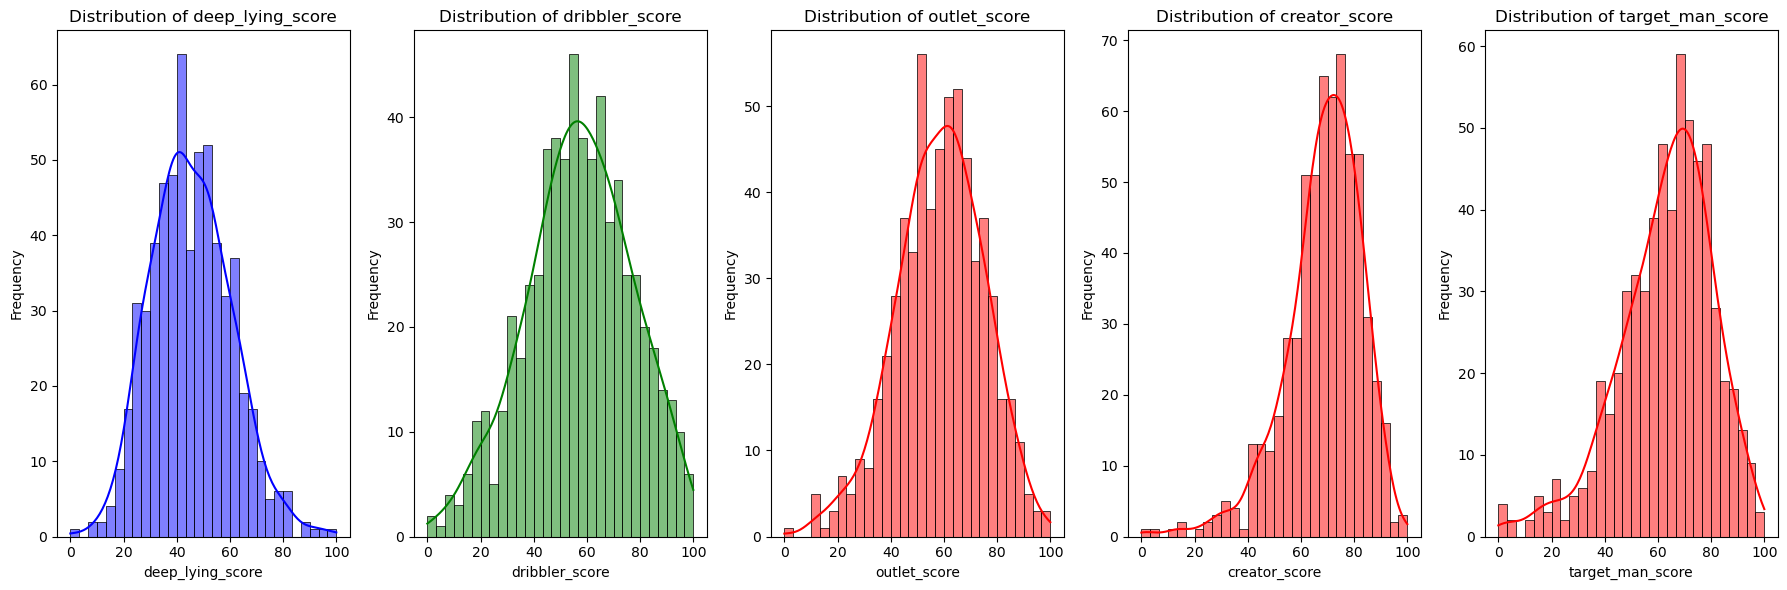

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 5, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(FW_scores_df['deep_lying_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of deep_lying_score')
plt.xlabel('deep_lying_score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 5, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(FW_scores_df['dribbler_score'], bins=30, kde=True, color='green')
plt.title('Distribution of dribbler_score')
plt.xlabel('dribbler_score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 5, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(FW_scores_df['outlet_score'], bins=30, kde=True, color='red')
plt.title('Distribution of outlet_score')
plt.xlabel('outlet_score')
plt.ylabel('Frequency')


# Attacking Score
plt.subplot(1, 5, 4)  # 1 row, 3 columns, 3rd subplot
sns.histplot(FW_scores_df['creator_score'], bins=30, kde=True, color='red')
plt.title('Distribution of creator_score')
plt.xlabel('creator_score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 5, 5)  # 1 row, 3 columns, 3rd subplot
sns.histplot(FW_scores_df['target_man_score'], bins=30, kde=True, color='red')
plt.title('Distribution of target_man_score')
plt.xlabel('target_man_score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
import re

# Create a new column called 'age' in CB_scores
FW_scores_df['age'] = None

# Loop through each row in CB_scores
for index, row in FW_scores_df.iterrows():
    # Get the team and player name from the current row
    team = row['team']
    player = row['player']

    # Find the matching player in the players_df
    matching_player = players_df[(players_df['team'] == team) & (players_df['player'] == player)]

    # If a matching player is found, update the 'age' column in CB_scores
    if not matching_player.empty:
        FW_scores_df.loc[index, 'age'] = matching_player['age'].values[0]

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
FW_scores_df['age'] = FW_scores_df['age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if pd.notnull(x) else x)

# Print the CB_scores DataFrame to verify
print(FW_scores_df)

              player             team              league  poacher_score  \
0      Eddie Nketiah          Arsenal  ENG-Premier League      66.723789   
1      Gabriel Jesus          Arsenal  ENG-Premier League      66.232726   
2       Moussa Diaby      Aston Villa  ENG-Premier League      63.103051   
3      Ollie Watkins      Aston Villa  ENG-Premier League      82.168000   
4    Dominic Solanke      Bournemouth  ENG-Premier League      80.442405   
..               ...              ...                 ...            ...   
613    Mateo Coronel          Tucumán          ARG-League      57.397167   
614      Ramiro Ruiz          Tucumán          ARG-League      52.923663   
615     Abiel Osorio  Vélez Sarsfield          ARG-League      44.483816   
616     Lucas Pratto  Vélez Sarsfield          ARG-League      49.774437   
617  Santiago Castro  Vélez Sarsfield          ARG-League      49.579568   

     outlet_score  deep_lying_score  dribbler_score  creator_score  \
0       64.415332

In [39]:
FW_scores_df.to_csv('Forward Role Scores.csv', index=False)